# Financial Inclusion In Africa

Financial Inclusion is a goal to make financial services accessible and affordable to all individuals and businesses. It involves removing barriers that exclude people from participating in the financial sector and using these services to improve their lives.  In Africa, financial inclusion remains a significant challenge that hampers economic and human development.

Historically, access to bank accounts has been considered a key indicator of financial inclusion. Despite the rise of mobile money and the emergence of innovative fintech solutions, banks continue to play a central role in facilitating access to financial services. Having a bank account empowers households to save money, conduct transactions, and enables businesses to establish creditworthiness, thereby enhancing their access to loans, insurance, and other related services. Consequently, access to bank accounts is a vital driver of long-term economic growth.


## Objective

* Create a machine learning Model to predict which individuals are most likely to have or use a bank account.

## Loading Python Libraries

In [2]:
# for data manipulation and analysis
import pandas as pd
# for numerical operations
import numpy as np
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data

In [10]:
df = pd.read_csv("/home/fiend/Documents/moringa/data_science/data/train.csv")
#/home/fiend/Documents/moringa/data_science/data
test = pd.read_excel("/home/fiend/Documents/moringa/data_science/data/test.xlsx")

In [11]:
# preview the columns
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [12]:
# preview last five rows
df.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [13]:
# shape of the dataframe 
print(f"The dataframe has: \n\t* {df.shape[0]} rows \n\t* {df.shape[1]} columns")

The dataframe has: 
	* 23524 rows 
	* 13 columns


In [14]:
# brief description about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


## Data Preparation

### Data Cleaning

In [15]:
# duplicates 

def duplicated_rows(data):
    """
    Identfies the duplicate rows in a dataframe, and deletes them
    
    parameters: 
        data(pd.DataFrame) - the dataframe to check and remove duplicates
        
    returns:
        data(pd.DataFrame) - the dataframe without duplicated rows
    """
    
    if (data.duplicated().any() == True):
        duplicated_counts = data.duplicated().value_counts()
        
        num_duplicated = duplicated_counts[True]
        print(f"The data has {num_duplicated} duplicated rows")
        data.drop_duplicates(subset=None, keep="first", inplace=True)
        print("Duplicated rows removed")
        
        data.reset_index(drop=True, inplace=True)
        
        return data
        
    else:
        print("The dataframe has no duplicated rows")
        return data

In [16]:
df = duplicated_rows(df)

The dataframe has no duplicated rows


In [17]:
# unncessary columns
df.drop(columns=["uniqueid"], inplace=True)

## Exploratory Data Analysis

### Univariate Analysis

In [18]:
# country
country = df.groupby(["country"])["country"].count()
country

country
Kenya       6068
Rwanda      8735
Tanzania    6620
Uganda      2101
Name: country, dtype: int64

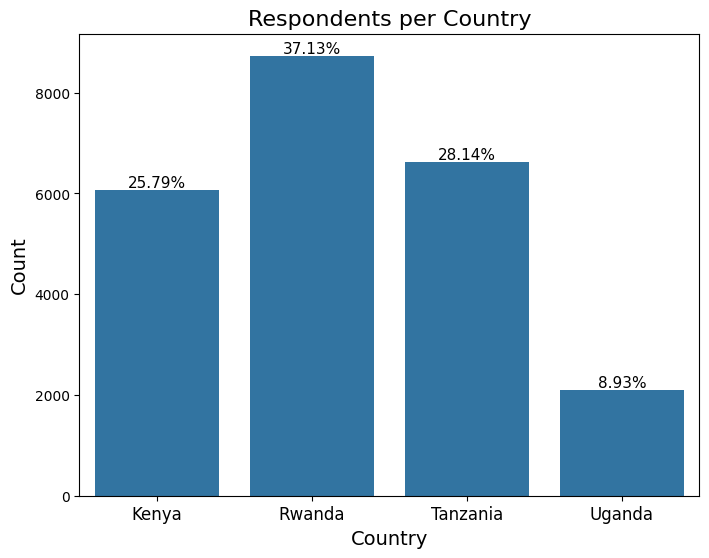

In [20]:
# visualize the data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

sns.barplot(x=country.index, y=country.values, ax=ax)
# label the axis
ax.set_xlabel("Country", fontsize=14) # labeling the x axis 
ax.set_ylabel("Count", fontsize=14) # labeling the y axis
ax.set_title("Respondents per Country", fontsize=16) # title of the plot
# Set the size of the x-tick labels
ax.tick_params(axis='x',labelsize=12)
# Add values on top of bars
percentages = country/country.sum() * 100
for i,v in enumerate(country):
    ax.text(i,v+50,f"{percentages.iloc[i]:.2f}%", ha='center',fontsize=11)

#fig.savefig("visuals/country.jpeg")

In [81]:
# bank account

bank_account=df.groupby(["bank_account"])["bank_account"].count()
bank_account

bank_account
No     20212
Yes     3312
Name: bank_account, dtype: int64

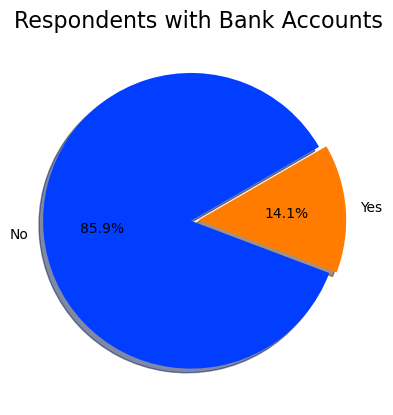

In [98]:
# visualize
plt.pie(x=bank_account.values, labels = bank_account.index,
        colors = sns.color_palette('bright')[0:5],autopct='%1.1f%%',
        explode=[0.05, 0], startangle=30, shadow=True)

plt.title('Respondents with Bank Accounts', fontsize=16)

plt.savefig('visuals/bankaccounts.png')

plt.show()

In [100]:
# location type

location=df.groupby(['location_type'])['location_type'].count()
location

location_type
Rural    14343
Urban     9181
Name: location_type, dtype: int64

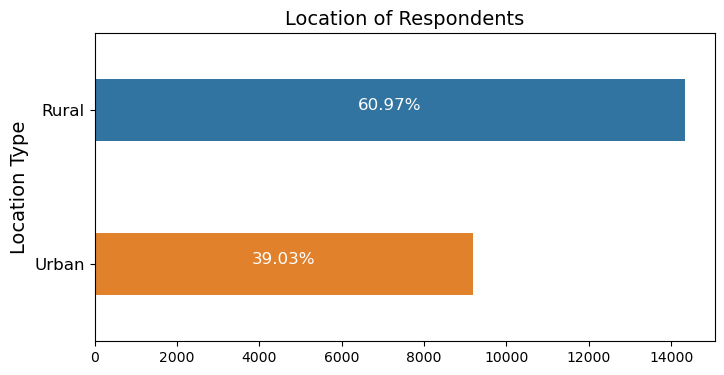

In [106]:
# visualize
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

sns.barplot(x=location.values, y=location.index, width=0.4, ax=ax) # horizontal bar graph 
ax.set_ylabel('Location Type', fontsize=14) 
ax.set_title('Location of Respondents', fontsize=14)

# add percetages 
percentages = location/location.sum() * 100
for j,k in enumerate(location):
    ax.text(k/2,j,f'{percentages[j]:.2f}%', color='white', ha='center', fontsize=12)
# adjust the y-ticks    
ax.tick_params(axis='y', labelsize=12)

fig.savefig('visuals/locations.jpeg')

In [ ]:
ax.text(x-coordinate, y-coordinate, string)

In [103]:
# cellphone_access

cellphone_access=df.groupby(['cellphone_access'])['cellphone_access'].count()
cellphone_access
    

cellphone_access
No      6070
Yes    17454
Name: cellphone_access, dtype: int64

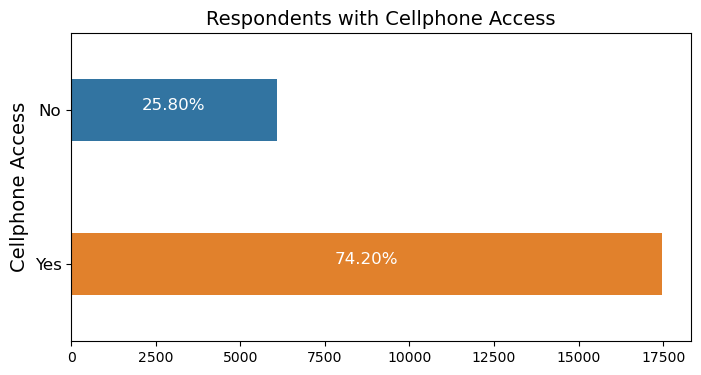

In [194]:
# visualize
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

sns.barplot(x=cellphone_access.values, y=cellphone_access.index, width=0.4, ax=ax)
ax.set_ylabel('Cellphone Access', fontsize=14)
ax.set_title('Respondents with Cellphone Access', fontsize=14)

# add percetages 
percentages = cellphone_access/cellphone_access.sum() * 100
for j,k in enumerate(cellphone_access):
    ax.text(k/2,j,f'{percentages[j]:.2f}%', color='white', ha='center', fontsize=12)
# adjust the y-ticks    
ax.tick_params(axis='y', labelsize=12)

fig.savefig('visuals/cellphone_access.jpeg')

In [105]:
# household_size
household_size = df.groupby(['household_size'])['household_size'].count()
household_size

household_size
1     3057
2     5229
3     3920
4     3474
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
14      10
15      11
16       4
17       1
18       1
20       1
21       1
Name: household_size, dtype: int64

In [109]:
df['household_size'].mode()[0]

2

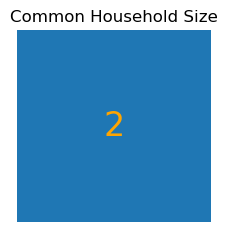

In [114]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5,2.5))

rect = plt.Rectangle((0,0),1,1,fill=True)
ax.add_patch(rect)

# add text 
ax.text(0.5,0.5,df['household_size'].mode()[0],ha='center', va='center', fontsize=24, color='orange')
ax.set_title('Common Household Size')
# Remove the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

fig.savefig('visuals/common_house_size.jpeg')

plt.show()

In [156]:
# age_of_respondent

avg_age = df['age_of_respondent'].mean()
print(np.round(avg_age,2))

38.81


In [160]:
max_age = df['age_of_respondent'].max()
print(max_age)

100


In [161]:
min_age = df['age_of_respondent'].min()
print(min_age)

16


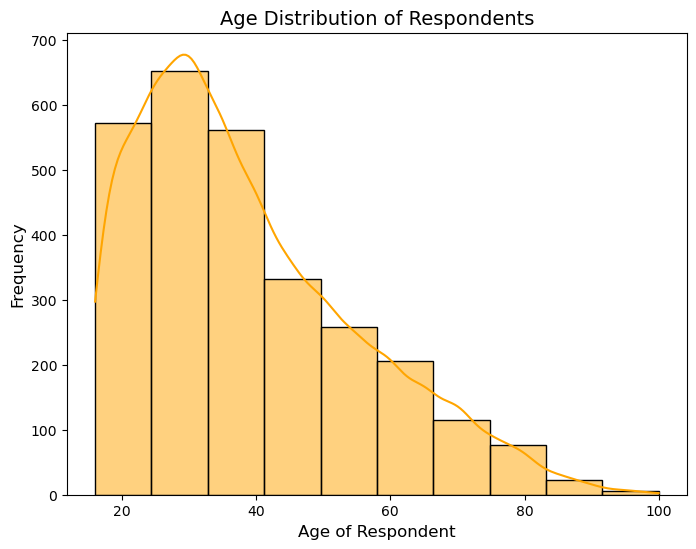

In [170]:
# visualize

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

sns.histplot(data=df,x='age_of_respondent',stat='frequency',bins=10, kde=True, color='orange')

ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Age of Respondent', fontsize=12)
ax.set_title("Age Distribution of Respondents", fontsize=14)

fig.savefig('visuals/age_distribution.jpeg')

plt.show()

In [171]:
# gender_of_respondent
gender = df['gender_of_respondent'].value_counts()
gender

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

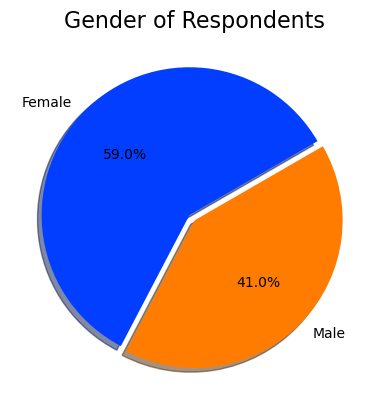

In [176]:
# visualize
plt.pie(x=gender.values, labels=gender.index,
        colors = sns.color_palette('bright')[0:5],autopct='%1.1f%%',
        explode=[0.05, 0], startangle=30, shadow=True)
plt.title('Gender of Respondents', fontsize=16)

plt.savefig('visuals/gender_of_respondent.jpeg')

plt.show()

In [115]:
# relationship_with_head
relationship_with_head = df['relationship_with_head'].value_counts()
relationship_with_head

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64

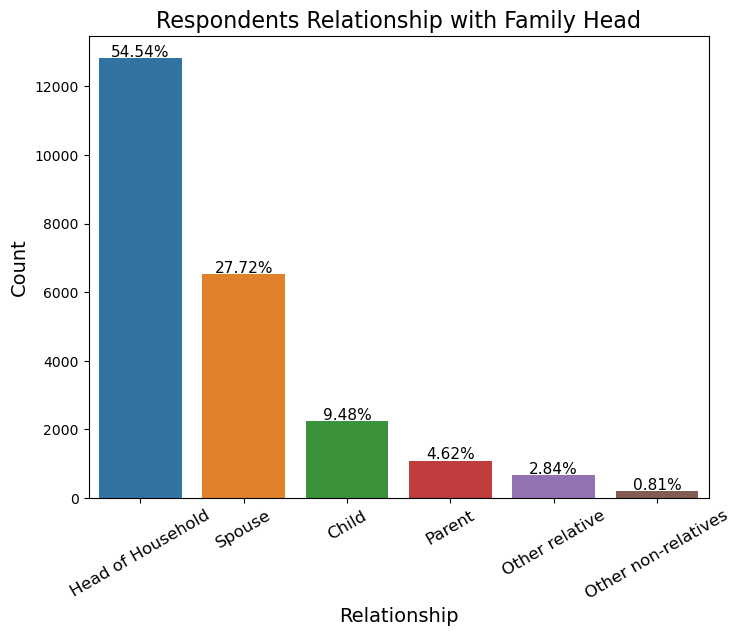

In [117]:
# visualize the data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.barplot(x=relationship_with_head.index, y=relationship_with_head.values, ax=ax)
# label the axis
ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("Relationship", fontsize=14)
ax.set_title("Respondents Relationship with Family Head", fontsize=16)
# Set the size of the x-tick labels
# also rotate the x-ticks
ax.tick_params(axis='x', labelsize=12, rotation=30)
# Add values on top of bars
percentages = relationship_with_head/relationship_with_head.sum() * 100
for i,v in enumerate(relationship_with_head):
    ax.text(i,v+50,f"{percentages.iloc[i]:.2f}%",ha='center',fontsize=11)

fig.savefig("visuals/relationship_with_head.jpeg")

In [195]:
# marital_status
marital_status=df.groupby(['marital_status'])['marital_status'].count()
marital_status

marital_status
Divorced/Seperated          2076
Dont know                      8
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Name: marital_status, dtype: int64

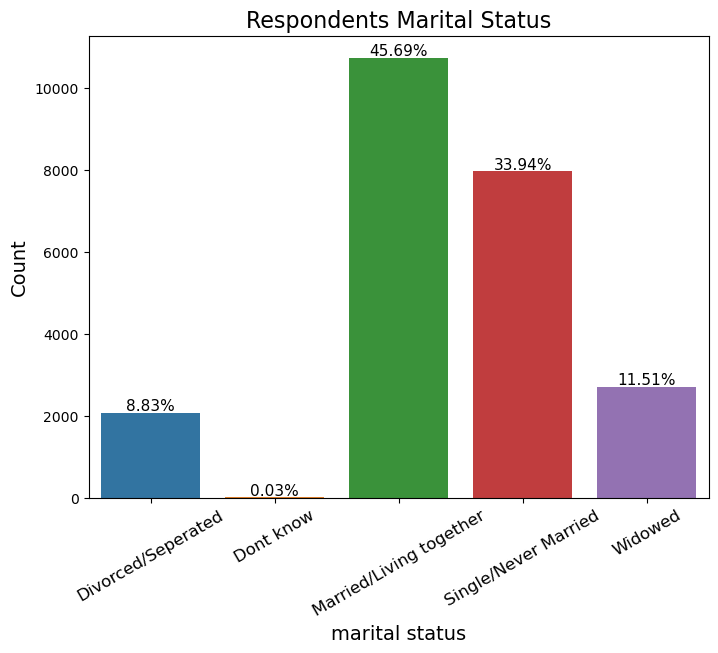

In [208]:
# visualize the data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

sns.barplot(x=marital_status.index, y=marital_status.values, ax=ax)
# label the axis
ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("marital status", fontsize=14)
ax.set_title("Respondents Marital Status", fontsize=16)
# Set the size of the x-tick labels
# also rotate the x-ticks
ax.tick_params(axis='x', labelsize=12, rotation=30)
# Add values on top of bars
percentages = marital_status/marital_status.sum() * 100
for i,v in enumerate(marital_status):
    ax.text(i,v+50,f"{percentages.iloc[i]:.2f}%",ha='center',fontsize=11)

fig.savefig("visuals/marital_status.jpeg")

In [209]:
education_level=df.groupby(['education_level'])['education_level'].count()      
education_level      

education_level
No formal education                 4515
Other/Dont know/RTA                   35
Primary education                  12791
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Name: education_level, dtype: int64

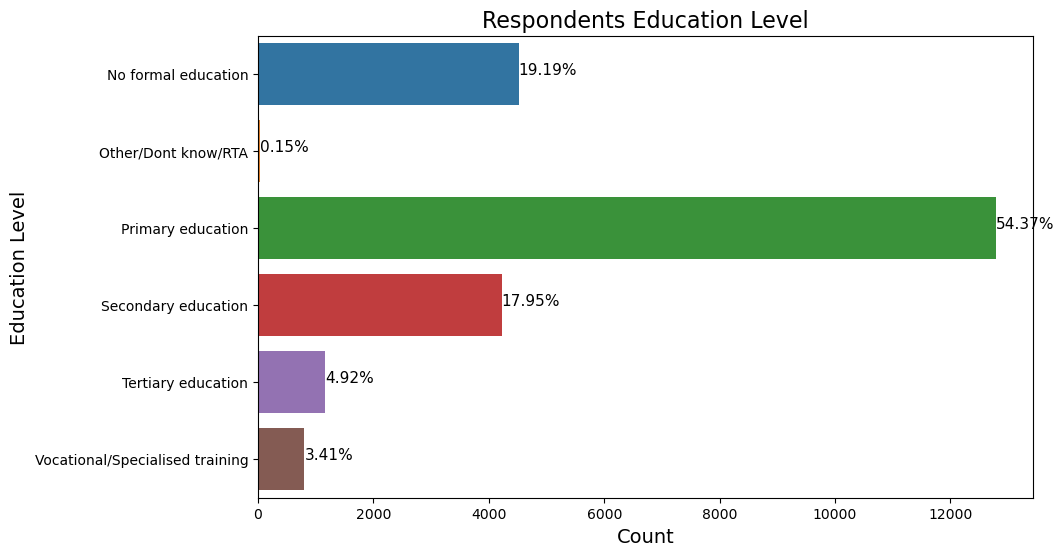

In [238]:
# visualize the data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

sns.barplot(y=education_level.index, x=education_level.values, ax=ax)
# label the axis
ax.set_xlabel("Count", fontsize=14)
ax.set_ylabel("Education Level", fontsize=14)
ax.set_title("Respondents Education Level", fontsize=16)

# Add values on top of bars
percentages = education_level/education_level.sum() * 100
for i,v in enumerate(education_level):
    ax.text(v,i,f"{percentages.iloc[i]:.2f}%",ha='left',fontsize=11)

fig.savefig("visuals/education_level.jpeg")

In [211]:
job_type=df.groupby(['job_type'])['job_type'].count()
job_type

job_type
Dont Know/Refuse to answer       126
Farming and Fishing             5441
Formally employed Government     387
Formally employed Private       1055
Government Dependent             247
Informally employed             5597
No Income                        627
Other Income                    1080
Remittance Dependent            2527
Self employed                   6437
Name: job_type, dtype: int64

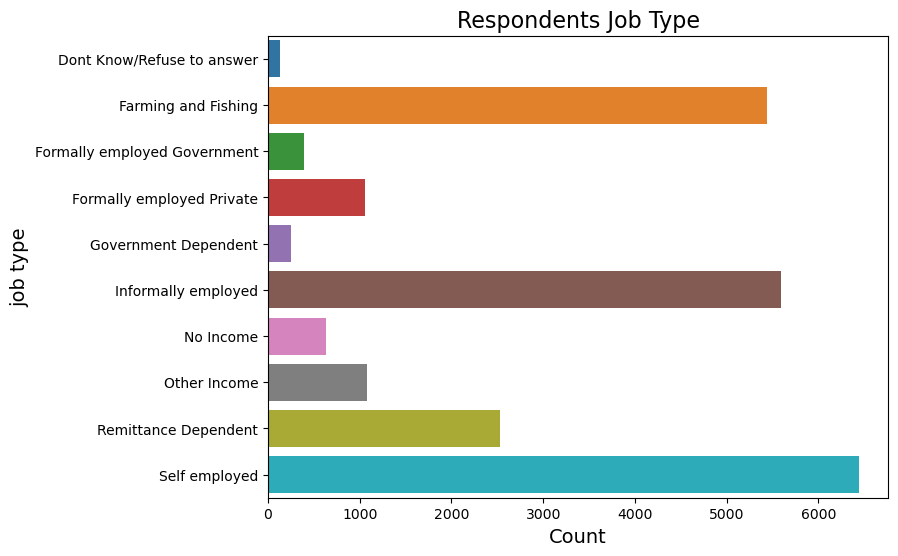

In [239]:
# visualize the data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

sns.barplot(y=job_type.index, x=job_type.values, ax=ax)
# label the axis
ax.set_xlabel("Count", fontsize=14)
ax.set_ylabel("job type", fontsize=14)
ax.set_title("Respondents Job Type", fontsize=16)

fig.savefig("visuals/job_type.jpeg")

plt.show()

In [30]:
"""create a pandas series of names and ages of 10 individual"""
data = {"Jelly": 20, "Billy":34, "Kelly":18, "Elly":28, "Fanny":25, "Ginny":22, "Happy":55, "Ivvy":28, "Jill":35}

In [31]:
df = pd.Series(data, name='students')
df

Jelly    20
Billy    34
Kelly    18
Elly     28
Fanny    25
Ginny    22
Happy    55
Ivvy     28
Jill     35
Name: students, dtype: int64

ValueError: Could not interpret value `name` for `hue`. Value is a string, but `data` was not passed.

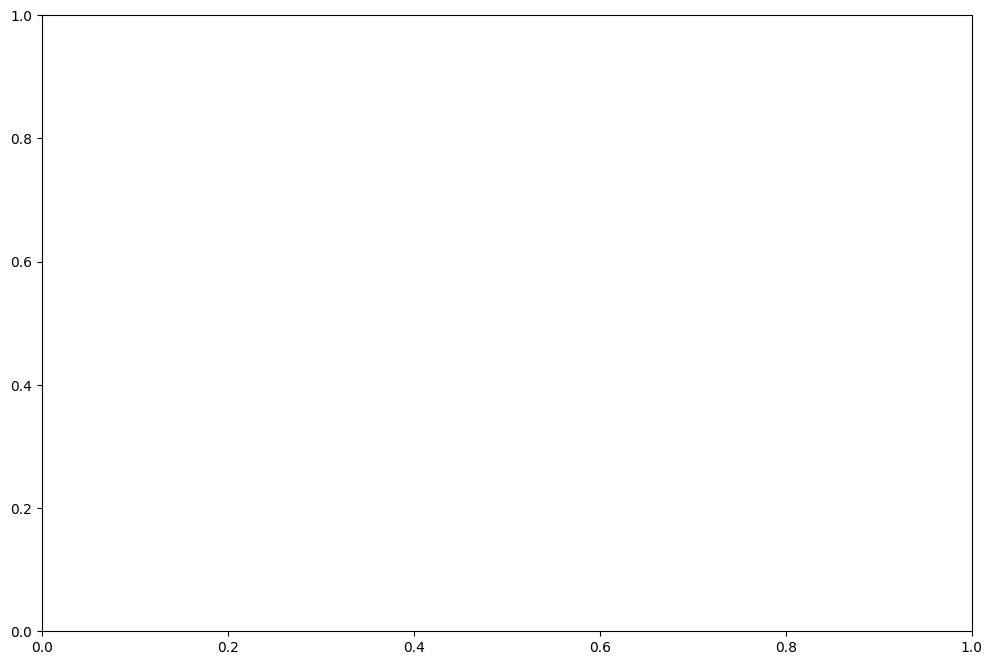

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.barplot(y=df.values, x=df.index, hue="name", ax=ax)
ax.set_title('Age Distribution', fontsize = 16)
ax.set_xlabel('Names', fontsize = 12)
ax.set_ylabel('Age', fontsize= 12)
plt.show()
